
# Geometric Brownian Motion

La dinamica del prezzo di un'azione \( S_t \) secondo il modello di **Geometric Brownian Motion** è descritta dalla seguente equazione differenziale stocastica:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

---

**Forma integrata** (ottenuta applicando l'Itô lemma):

$$
\ln S_t = \ln S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t
$$

---

**Espressione esplicita** del processo:

$$
S_t = S_0 \, \exp \left[ \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \right]
$$



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Definiamo i parametri 

In [10]:
# coefficiente drift
mu=0.1

#steps
n= 100

#tempo in anni
T=1

#n.di simulazioni
M=100

# prezzo di partenza dell'azione
S0=100

#Volatilità
sigma=0.30


### ### Simulazione di traiettorie del GBM tramite generazione log-normale


L'equazione stocastica del GBM ha soluzione analitica:  

$$
S_t = S_0 \exp\left[ \left(\mu - \frac{\sigma^2}{2} \right)t + \sigma W_t \right]
$$  

Discretizzando il tempo in passi \(dt = T/n\), possiamo simulare le variazioni casuali con distribuzione normale  
$$
N(0, \sqrt{dt})
$$  
e calcolare i prezzi a ogni passo.

In [14]:
# time step
dt= T/n

# simulazione usando l'array di np
St= np.exp(
    (mu-sigma**2/2)*dt
    +sigma*np.random.normal(0,np.sqrt(dt),size=(M,n)).T
)

# aggiungimo un array di 1 (per rappresentare il tempo iniziale t=0)
St=np.vstack([np.ones(M),St])

# moltiplichiamo per S0 e calcola il prodotto cumulativo lungo ogni traiettoria simulata (asse=0)
St=S0*St.cumprod(axis=0)


## Creazione della matrice dei tempi per l'asse x del grafico

Per poter rappresentare le traiettorie simulate del **GBM** in funzione del tempo, è necessario costruire una matrice di valori temporali coerente con la dimensione della matrice $S_t$ che contiene i prezzi simulati.

1. **Definiamo** il vettore dei tempi:
$$
\text{time} = [0, \Delta t, 2\Delta t, \dots, T]
$$
dove $\Delta t = \frac{T}{n}$ e il numero di elementi è $n+1$ (incluso $t=0$).

2. **Replichiamo** questo vettore per ogni traiettoria simulata in modo da ottenere una matrice della stessa forma di $S_t$, così da poter plottare correttamente l’andamento nel tempo.


In [16]:
# definiamo correttamente l'intervallo temporale
time= np.linspace(0,T,n+1)

# generiamo un array NumPy delle stesse dimensioni di St, riempito con i valori dell'array 'time'
tt=np.full(shape=(M,n+1), fill_value=time).T


## Plotting 

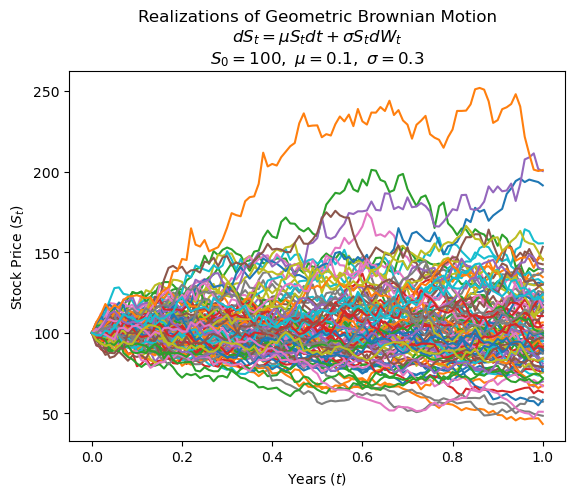

In [22]:
plt.plot(tt, St)
plt.xlabel(r"Years $(t)$")
plt.ylabel(r"Stock Price $(S_t)$")
plt.title(
    r"Realizations of Geometric Brownian Motion"
    + "\n"
    + r"$dS_t = \mu S_t dt + \sigma S_t dW_t$"
    + "\n"
    + r"$S_0 = {0},\ \mu = {1},\ \sigma = {2}$".format(S0, mu, sigma),
    fontsize=12
)
plt.show()